In [2]:
library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)
library(tidyverse)
library(ggplot2)
library(stringr)
library(ISLR)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
lift():      purrr, caret
transpose(): purrr, data.table
Warning message:
"package 'ISLR' was built under R version 3.4.3"

In [3]:
colorstats <- read.csv('Stats.csv')
colorstats %>%
  select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, People, Percentage.Cyan, Number.of.Likes) ->stat
stat %>%
    filter(Number.of.Likes <=100) -> stat1

stat1 %>%
    select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, Percentage.Cyan) ->sorted
cbind(sorted, t(apply(sorted, 1, sort, decreasing = TRUE))) -> sorted1
colnames(sorted1) <- c("Percentage.Black", "Percentage.White", "Percentage.Blue", "Percentage.Red", "Percentage.Yellow",
                     "Percentage.Green","Percentage.Purple","Percentage.Cyan", "Color1", "Color2", "Color3",
                     "Color4", "Color5", "Color6", "Color7", "Color8")
sorted1 %>%
 select(Color1, Color2, Color3, Color4, Color5, Color6, Color7, Color8) ->domcolor
dompcolor <- domcolor
domcolor$Likes <- stat1$Number.of.Likes
dompcolor$People <- stat1$People

In [4]:
#domcolor 1st
library(leaps)
regfit.full=regsubsets(Number.of.Likes∼.,stat1)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Number.of.Likes ~ ., stat1)
9 Variables  (and intercept)
                  Forced in Forced out
Percentage.Black      FALSE      FALSE
Percentage.White      FALSE      FALSE
Percentage.Blue       FALSE      FALSE
Percentage.Red        FALSE      FALSE
Percentage.Yellow     FALSE      FALSE
Percentage.Green      FALSE      FALSE
Percentage.Purple     FALSE      FALSE
People                FALSE      FALSE
Percentage.Cyan       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Percentage.Black Percentage.White Percentage.Blue Percentage.Red
1  ( 1 ) " "              " "              " "             " "           
2  ( 1 ) " "              " "              " "             " "           
3  ( 1 ) " "              " "              " "             " "           
4  ( 1 ) " "              " "              " "             " "           
5  ( 1 ) " "              " "              " "             "*"         

In [5]:
regfit.full=regsubsets(Number.of.Likes∼.,data=stat1 ,nvmax=19)
reg.summary =summary (regfit.full)
 reg.summary$rsq

Warning message in leaps.exhaustive(a, really.big):
"XHAUST returned error code -999"

[1] 1.616681e-05 6.856292e-04 1.009705e-03 1.497692e-03 4.338279e-03
[6] 4.560640e-03 5.826182e-03 6.497310e-03 7.417437e-03

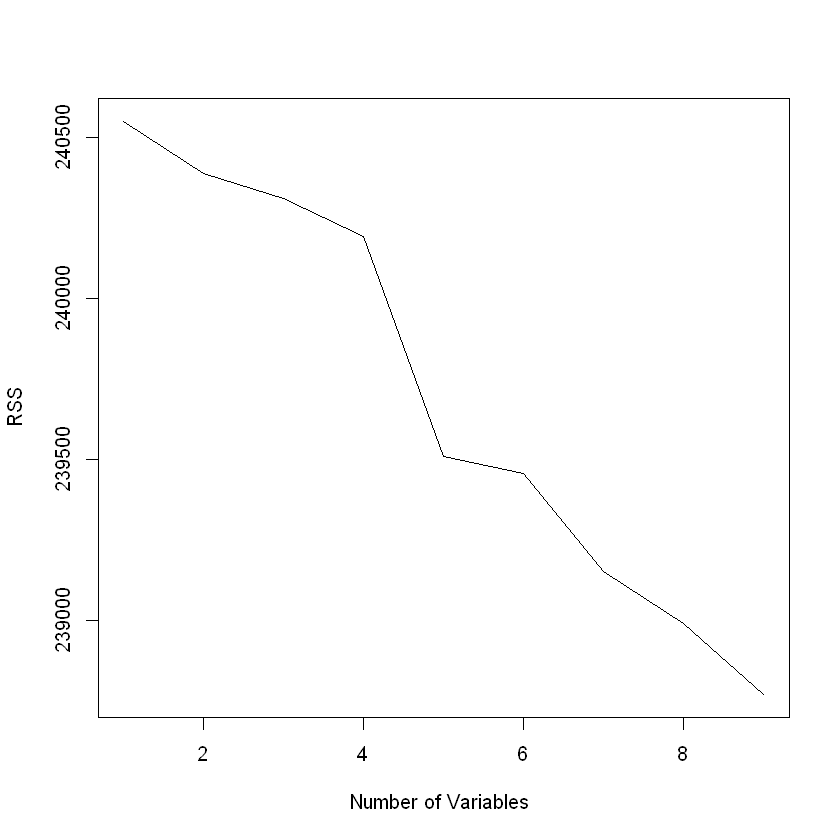

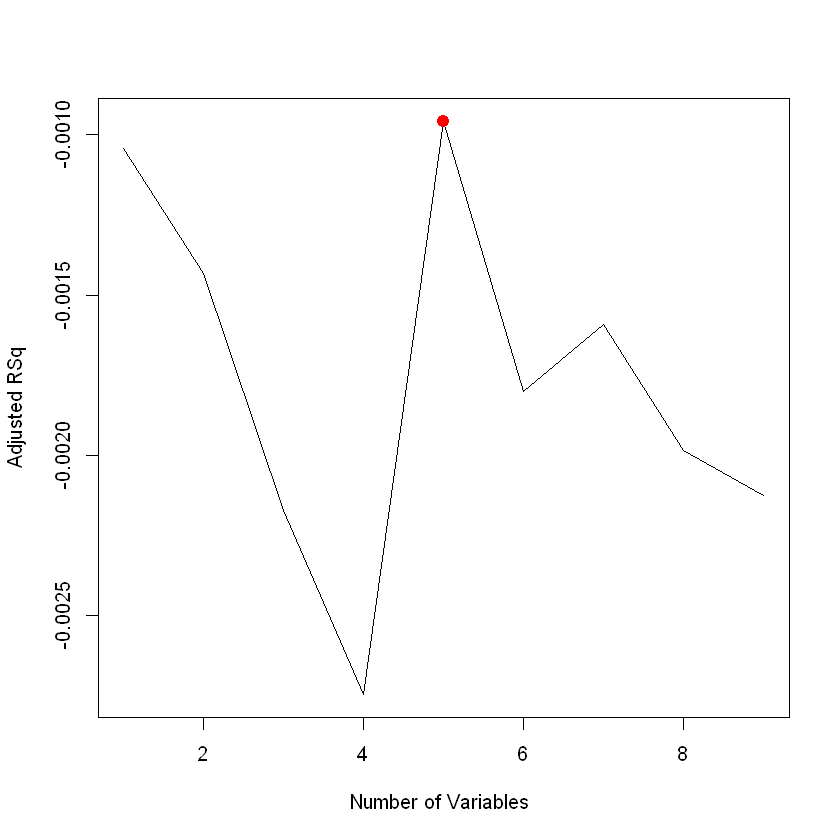

In [10]:
 plot(reg.summary$rss ,xlab="Number of Variables ",ylab="RSS",type="l")
 plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="Adjusted RSq",type="l")
points(5,reg.summary$adjr2[5],col="red",cex=2,pch=20)

In [9]:
which.max(reg.summary$adjr2)
a <- which.max(reg.summary$adjr2) 

[1] 5

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


[1] 1

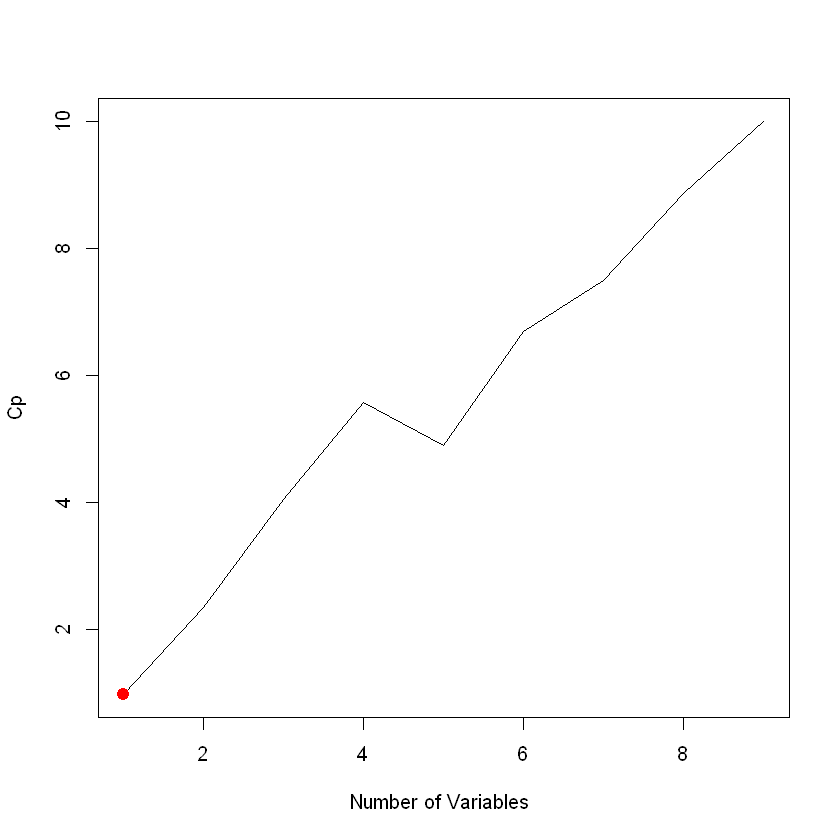

In [11]:
plot(reg.summary$cp ,xlab="Number of Variables ",ylab="Cp",type='l')

which.min(reg.summary$cp)
b <- which.min(reg.summary$cp)
points (1,reg.summary$cp[1], col ="red",cex=2,pch=20)

In [12]:

which.min(reg.summary$bic)
c <- which.min(reg.summary$bic)


[1] 1

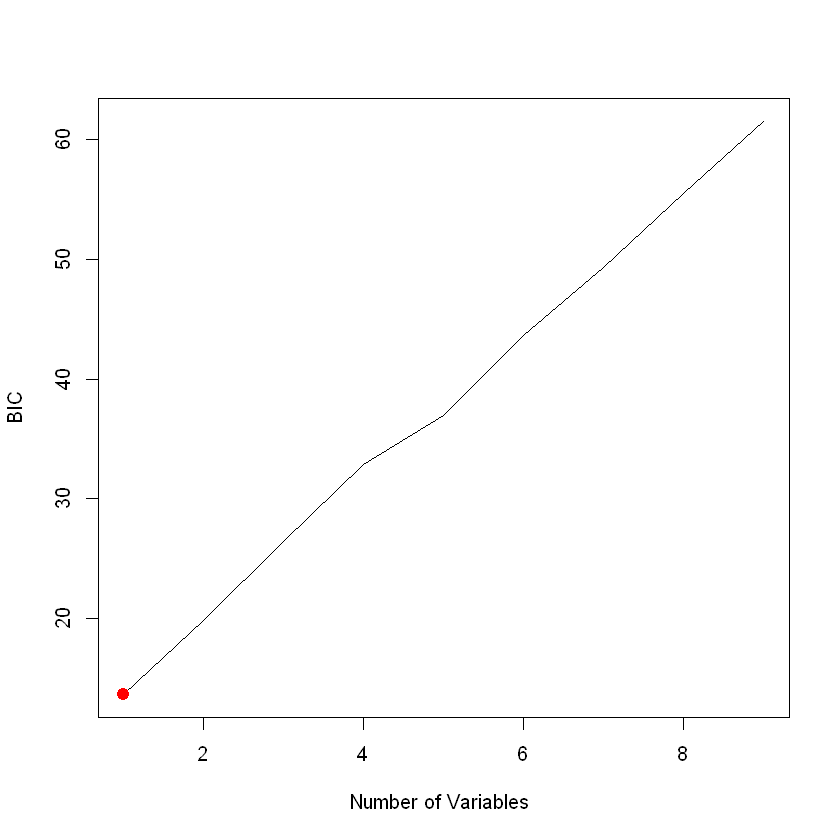

In [13]:
plot(reg.summary$bic,xlab="Number of Variables ",ylab="BIC",type="l")
points (1,reg.summary$bic[1],col="red",cex=2,pch =20)

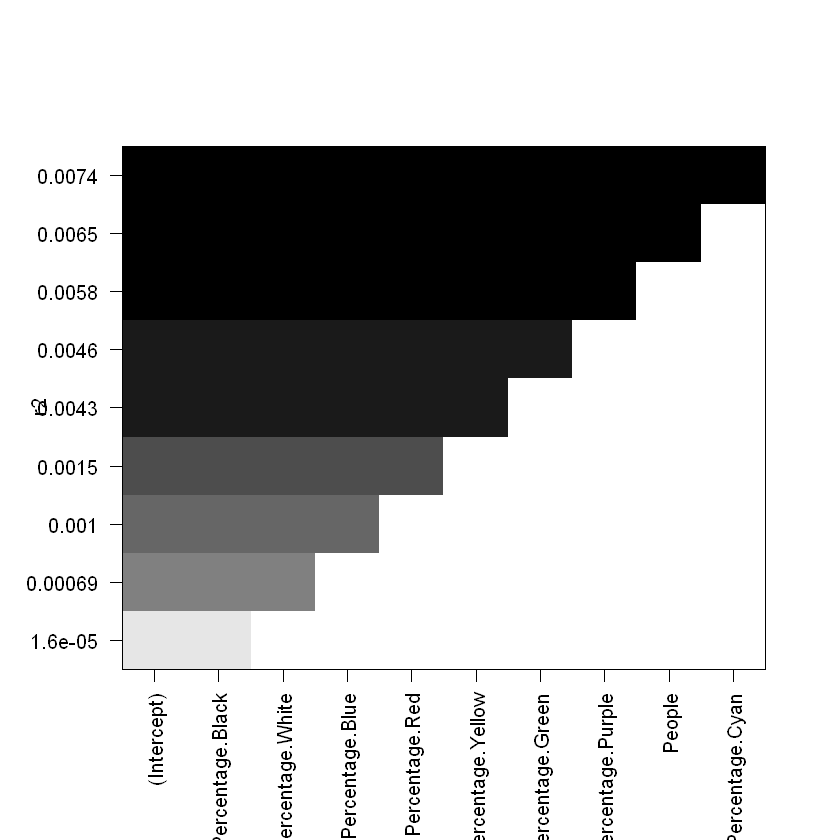

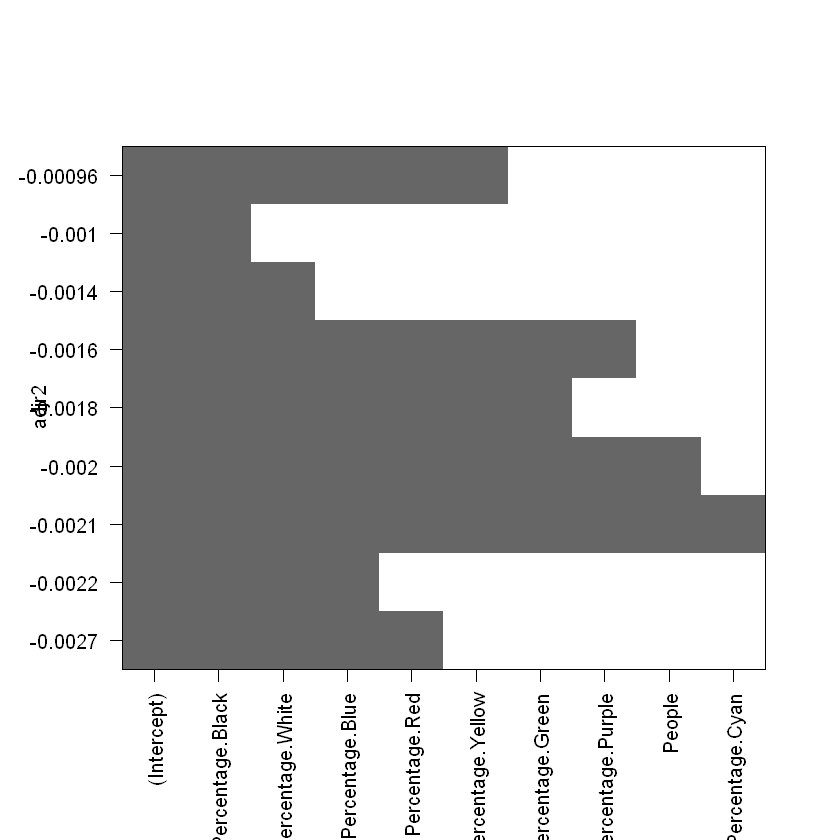

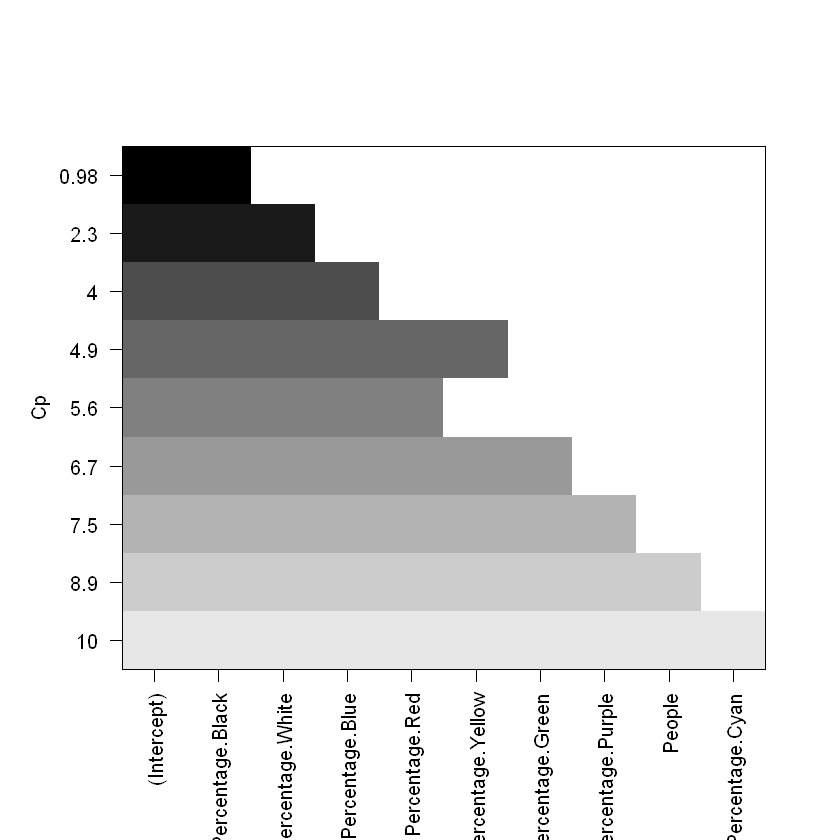

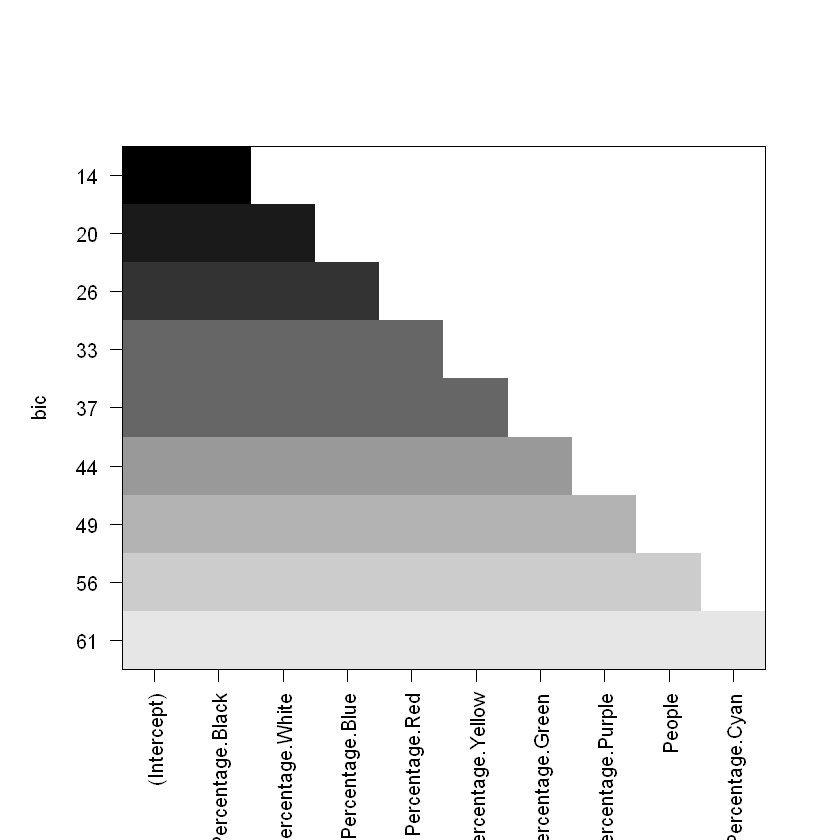

In [14]:
plot(regfit.full ,scale="r2")
plot(regfit.full ,scale="adjr2")
plot(regfit.full ,scale="Cp")
plot(regfit.full ,scale="bic")

In [15]:
coef(regfit.full,1)
#a, b, and c are values/numbers, so if it doesn't work, try replacing with
#numbers

(Intercept) Percentage.Black 
      21.6384121        0.2267514

In [16]:
regfit.fwd=regsubsets (Number.of.Likes∼.,data=stat1, nvmax=19, method ="forward")
summary(regfit.fwd)


Subset selection object
Call: regsubsets.formula(Number.of.Likes ~ ., data = stat1, nvmax = 19, 
    method = "forward")
9 Variables  (and intercept)
                  Forced in Forced out
Percentage.Black      FALSE      FALSE
Percentage.White      FALSE      FALSE
Percentage.Blue       FALSE      FALSE
Percentage.Red        FALSE      FALSE
Percentage.Yellow     FALSE      FALSE
Percentage.Green      FALSE      FALSE
Percentage.Purple     FALSE      FALSE
People                FALSE      FALSE
Percentage.Cyan       FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: forward
         Percentage.Black Percentage.White Percentage.Blue Percentage.Red
1  ( 1 ) " "              " "              " "             " "           
2  ( 1 ) " "              " "              " "             " "           
3  ( 1 ) " "              " "              " "             " "           
4  ( 1 ) " "              " "              " "             " "           
5  ( 1 ) " "              " " 

In [17]:
regfit.bwd=regsubsets(Number.of.Likes∼.,data=stat1 , nvmax=19, method ="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Number.of.Likes ~ ., data = stat1, nvmax = 19, 
    method = "backward")
9 Variables  (and intercept)
                  Forced in Forced out
Percentage.Black      FALSE      FALSE
Percentage.White      FALSE      FALSE
Percentage.Blue       FALSE      FALSE
Percentage.Red        FALSE      FALSE
Percentage.Yellow     FALSE      FALSE
Percentage.Green      FALSE      FALSE
Percentage.Purple     FALSE      FALSE
People                FALSE      FALSE
Percentage.Cyan       FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: backward
         Percentage.Black Percentage.White Percentage.Blue Percentage.Red
1  ( 1 ) " "              " "              " "             " "           
2  ( 1 ) " "              " "              " "             "*"           
3  ( 1 ) "*"              " "              " "             "*"           
4  ( 1 ) "*"              "*"              " "             "*"           
5  ( 1 ) "*"              "*

In [18]:
coef(regfit.full,6)

(Intercept)  Percentage.Black  Percentage.White   Percentage.Blue 
        29.490302         -7.404498         -7.086642        -10.844047 
   Percentage.Red Percentage.Yellow  Percentage.Green 
       -10.654771        -17.210821         10.733397

In [19]:
coef(regfit.full,5)

(Intercept)  Percentage.Black  Percentage.White   Percentage.Blue 
        31.954658         -9.827770         -9.591512        -14.481150 
   Percentage.Red Percentage.Yellow 
       -13.466950        -18.756627

In [20]:
coef(regfit.fwd,6)

(Intercept)   Percentage.Blue    Percentage.Red Percentage.Yellow 
       21.6452659        -2.8653244        -4.6297483        -9.7426629 
 Percentage.Green Percentage.Purple            People 
       20.0629287        29.2940304         0.4760957

In [21]:
coef(regfit.fwd,5)

(Intercept)    Percentage.Red Percentage.Yellow  Percentage.Green 
       21.5208248        -4.2613758        -9.4424989        20.6028684 
Percentage.Purple            People 
       28.0364653         0.4763308

In [22]:
coef(regfit.bwd,6)
#machinelearning 2-3 (1)(1)

(Intercept)  Percentage.Black  Percentage.White   Percentage.Blue 
         45.71347         -23.67698         -23.37127         -26.71346 
   Percentage.Red Percentage.Yellow   Percentage.Cyan 
        -27.50822         -33.47991         -20.80547

In [23]:
coef(regfit.bwd,5)

(Intercept)  Percentage.Black  Percentage.White   Percentage.Blue 
        31.954658         -9.827770         -9.591512        -14.481150 
   Percentage.Red Percentage.Yellow 
       -13.466950        -18.756627

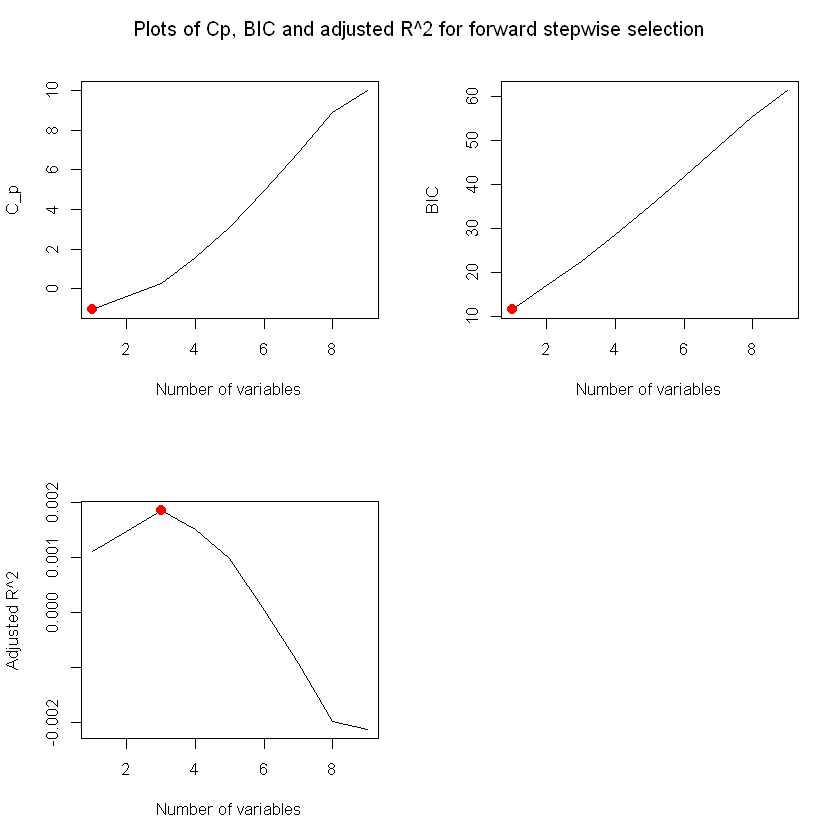

In [24]:
regfit.fwd <- regsubsets(Number.of.Likes ~ ., data = stat1, nvmax = 10, method = "forward")
reg.summary.fwd <- summary(regfit.fwd)
par(mfrow = c(2, 2))
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
mtext("Plots of Cp, BIC and adjusted R^2 for forward stepwise selection", side = 3, line = -2, outer = TRUE)

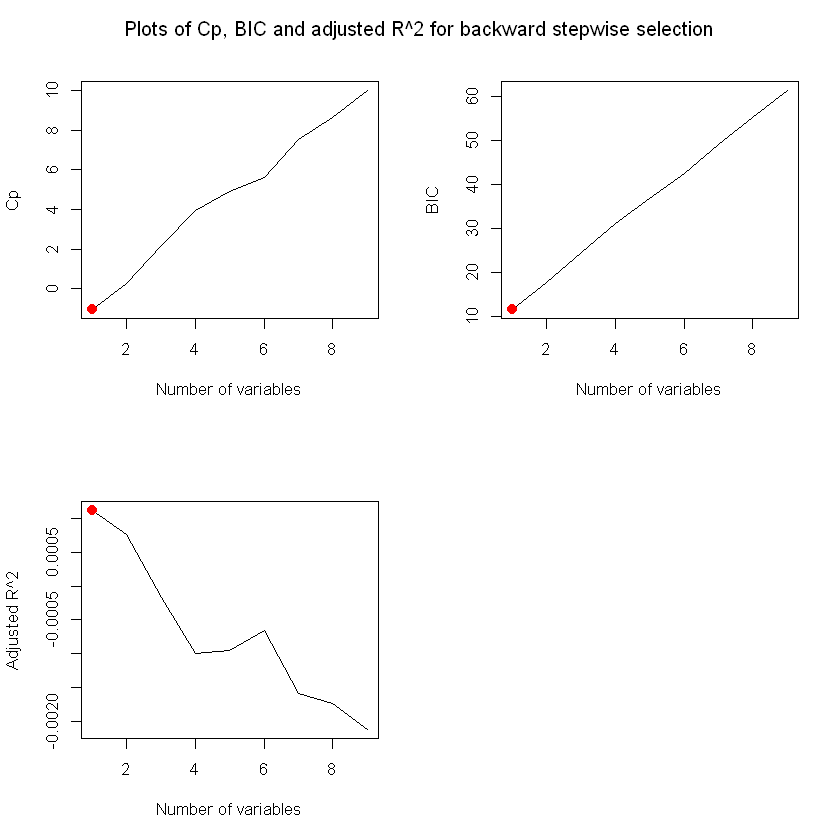

In [25]:
regfit.bwd <- regsubsets(Number.of.Likes ~ ., data = stat1, nvmax = 10, method = "backward")
reg.summary.bwd <- summary(regfit.bwd)
par(mfrow = c(2, 2))
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
mtext("Plots of Cp, BIC and adjusted R^2 for backward stepwise selection", side = 3, line = -2, outer = TRUE)

In [26]:
library(glmnet)
dat.mat=model.matrix(Number.of.Likes~.,data=stat1)[,-1]
y = stat1$Number.of.Likes
grid =10^ seq (10,-2, length =100)
ridge.mod =glmnet(dat.mat,y,alpha =0, lambda =grid)
sqrt(sum(coef(ridge.mod)[ -1 ,50]^2) )


Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loaded glmnet 2.0-13



[1] 0.04955454

In [27]:
sqrt(sum(coef(ridge.mod)[ -1 ,60]^2) )

[1] 0.78986

In [28]:
predict(ridge.mod,s=50, type ="coefficients")[1:9 ,]

(Intercept)  Percentage.Black  Percentage.White   Percentage.Blue 
      21.64566226        0.06068193        0.13004147        0.11580345 
   Percentage.Red Percentage.Yellow  Percentage.Green Percentage.Purple 
      -1.41212315       -2.33813568        4.12176352        7.06388094 
           People 
       0.09987181

In [29]:
set.seed (1)
train=sample(1:nrow(dat.mat), nrow(dat.mat)/2)
test=(-train)
y.test=y[test]

In [30]:
ridge.mod =glmnet(dat.mat[train,] , y[train], alpha=0, lambda=grid, thresh= 1e-12)
ridge.pred=predict(ridge.mod ,s=4, newx=dat.mat[test,])
mean((ridge.pred-y.test)^2)

[1] 257.8368

In [31]:
mean(( mean(y[train ])-y.test)^2)

[1] 253.2602

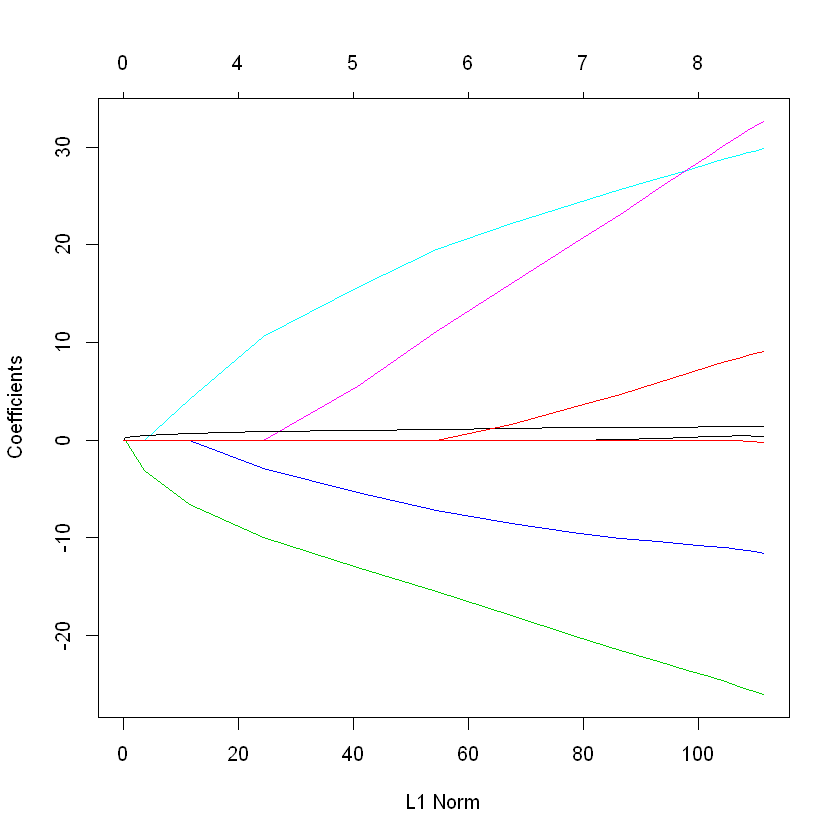

In [32]:
lasso.mod =glmnet(dat.mat[train ,],y[train],alpha =1, lambda=grid)
plot(lasso.mod)


[1] 253.395

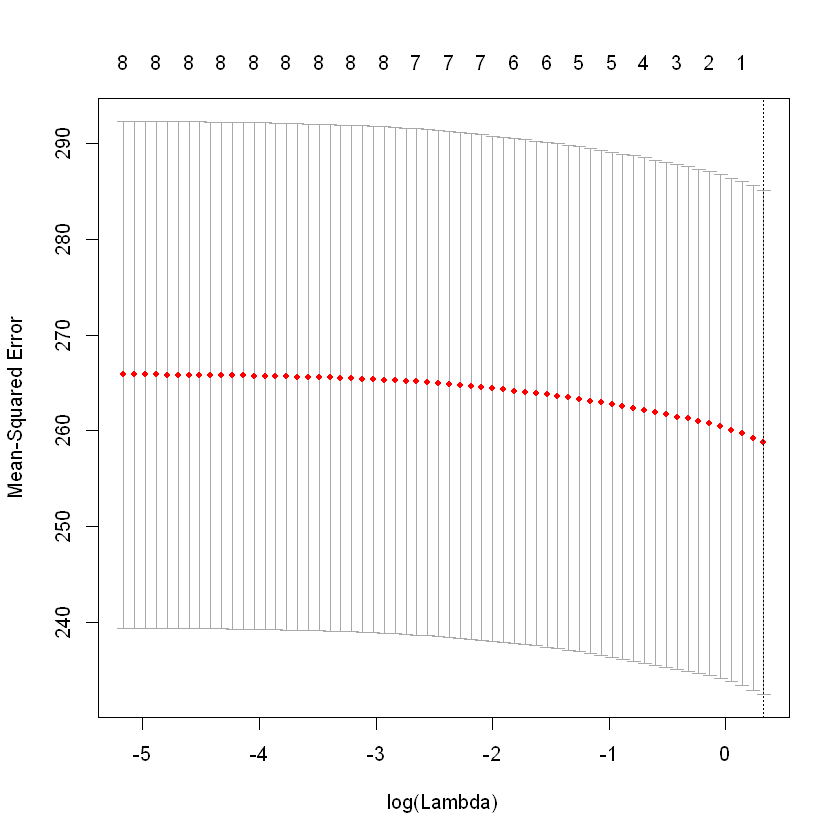

In [33]:
set.seed (1)
cv.out =cv.glmnet(dat.mat[train ,],y[train],alpha=1)
plot(cv.out)
bestlam =cv.out$lambda.min
lasso.pred=predict(lasso.mod ,s=bestlam ,newx=dat.mat[test,])
mean((lasso.pred-y.test)^2)


In [35]:
cv.out=cv.glmnet(dat.mat,stat1,alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

lasso.mod=glmnet(dat.mat,y,alpha=1,lambda=bestlam)
coef(lasso.mod)

ERROR: Error in storage.mode(y) <- "double": (list) object cannot be coerced to type 'double'


In [5]:
Cols= function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}


In [6]:
plot(pr.out$x[,1:2], col=Cols(domcolor), pch=19, xlab="Z1", ylab="Z2")
#not sure what x is used for, but probably try that with the actual
#data instead?

ERROR: Error in plot(pr.out$x[, 1:2], col = Cols(domcolor), pch = 19, xlab = "Z1", : object 'pr.out' not found


In [ ]:
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19, xlab="Z1", ylab="Z3")

In [ ]:
summary(pr.out)

In [ ]:
plot(pr.out)

In [ ]:
pve=100*pr.out$sdev^2/ sum(pr.out$sdev^2)

plot(pve, type="o", ylab="PVE", xlab="Principal Component", col="blue")

In [ ]:
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

In [ ]:
sd.data=scale(nci.data)

In [ ]:
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage",
    xlab="", sub="", ylab="")

In [ ]:
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage",
    xlab="", sub="", ylab="")

In [ ]:
plot(hclust(data.dist, method="single"), labels=nci.labs, main="Single Linkage",
    xlab="", sub="", ylab="")

In [ ]:
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)

In [ ]:
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [ ]:
hc.out

In [ ]:
set.seed(2)
km.out=kmeans(sd.data,4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters,hc.clusters)

In [ ]:
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")

In [ ]:
table(cutree(hc.out,4), nci.labs)